<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Gestión de Outliers

AutoRenew, la empresa líder en la venta de coches de segunda mano, sigue adelante con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Este modelo es clave para mejorar las estrategias de ventas, marketing y optimización del inventario de la empresa. Ya has realizado un análisis exploratorio inicial y gestionado los valores nulos en el conjunto de datos. Ahora, es el momento de abordar otro aspecto crucial del preprocesamiento: la **gestión de outliers**.

En este laboratorio, te enfocarás en identificar y gestionar los outliers (valores atípicos) presentes en el conjunto de datos. Los outliers pueden distorsionar los resultados de un análisis y afectar negativamente el rendimiento de los modelos predictivos, por lo que es fundamental tratarlos adecuadamente antes de proceder con las siguientes fases del proyecto.


**Instrucciones:**

1. **Identificación de Outliers:** Explora las columnas clave del conjunto de datos (como `price`, `powerCV`, `kilometer`, etc.) para identificar posibles outliers. Utiliza gráficos como diagramas de caja (boxplots) y análisis estadísticos para detectar valores que se desvíen significativamente del resto de los datos.

2. **Análisis de Outliers:** Una vez identificados, analiza los outliers para determinar si son errores de datos, valores extremos válidos o resultados de condiciones específicas que deben ser tenidos en cuenta. Considera el contexto de cada columna al evaluar la relevancia de estos valores atípicos.

3. **Gestión de Outliers:** Decide la estrategia más adecuada para manejar los outliers. Esto podría incluir la eliminación de los outliers, la transformación de los datos, o la aplicación de técnicas de imputación. Justifica tu elección basándote en cómo los outliers podrían afectar el modelo predictivo.

**Nota:** Recuerda que este laboratorio es parte de una serie de actividades en las que utilizarás el mismo conjunto de datos a lo largo de la semana. Documenta cuidadosamente los pasos que sigas para que puedas referirte a ellos en las próximas etapas del proyecto.


In [1]:
pip install --upgrade matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [38]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

# traigo mis funciones
import sys

sys.path.append('../') #pongo los 2 puntos para que salga de la carpeta
import src.funciones as f

# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product
from itertools import combinations

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('C:\\Users\\DELL\\Git\\Lab_EDA_Gestion_Nulos\\datos\\df_filtrado.csv', index_col=0)
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,model,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,Desconocido,Modernos,manually,0.075206,golf,0.0,Desconocido,petrol,volkswagen,Desconocido,2016-04-07 03:16:57,2016,3
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,Actuales,manually,1.063492,Desconocido,-1.0,5,diesel,audi,yes,2016-04-07 01:46:50,2016,3
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,Modernos,automatic,0.650794,grand,-1.0,8,diesel,jeep,Desconocido,2016-04-05 12:47:46,2016,3
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,Modernos,manually,-0.730159,golf,0.0,6,petrol,volkswagen,no,2016-03-17 17:40:17,2016,3
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,Modernos,manually,-0.825397,fabia,-2.4,7,diesel,skoda,no,2016-04-06 10:17:21,2016,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360574 entries, 0 to 360573
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          360574 non-null  object 
 1   name                 360574 non-null  object 
 2   seller               360574 non-null  object 
 3   offerType            360574 non-null  object 
 4   price                360574 non-null  int64  
 5   abtest               360574 non-null  object 
 6   vehicleType          360574 non-null  object 
 7   yearOfRegistration   360574 non-null  object 
 8   gearbox              360574 non-null  object 
 9   powerCV_robust       360574 non-null  float64
 10  model                360574 non-null  object 
 11  kilometer_robust     360574 non-null  float64
 12  monthOfRegistration  360574 non-null  object 
 13  fuelType             360574 non-null  object 
 14  brand                360574 non-null  object 
 15  notRepairedDamage    3

In [5]:
df['year_created'] = df['year_created'].astype('category')
df['month_created'] = df['month_created'].astype('category')

Hago esto porque, aunque siempre que guardo y cargo estos datos se colocan como numéricos, estos para mí son categóricos.

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,360574.0,5858.772654,8261.664458,1.000000,1250.000000,3000.0,7490.000000,199900.000000
powerCV_robust,360574.0,0.075206,0.974926,-1.825397,-0.555556,0.0,0.444444,21.666667
kilometer_robust,360574.0,-0.972387,1.592025,-5.800000,-1.000000,0.0,0.000000,0.000000
outliers_lof_0.01_25,360574.0,0.980004,0.198978,-1.000000,1.000000,1.0,1.000000,1.000000
outliers_lof_0.01_35,360574.0,0.980004,0.198978,-1.000000,1.000000,1.0,1.000000,1.000000
outliers_lof_0.01_50,360574.0,0.979999,0.199005,-1.000000,1.000000,1.0,1.000000,1.000000
outliers_lof_0.05_25,360574.0,0.899998,0.435894,-1.000000,1.000000,1.0,1.000000,1.000000
outliers_lof_0.05_35,360574.0,0.900043,0.435802,-1.000000,1.000000,1.0,1.000000,1.000000
outliers_lof_0.05_50,360574.0,0.900015,0.435860,-1.000000,1.000000,1.0,1.000000,1.000000
outliers_lof_0.1_25,360574.0,0.799997,0.600005,-1.000000,1.000000,1.0,1.000000,1.000000


In [6]:
df_num = df.select_dtypes(include=np.number)
cols_numericas = df.select_dtypes(include=np.number).columns
df_num.head()

,price,powerCV_robust,kilometer_robust
0,480,0.075206,0.0
1,18300,1.063492,-1.0
2,9800,0.650794,-1.0
3,1500,-0.730159,0.0
4,3600,-0.825397,-2.4


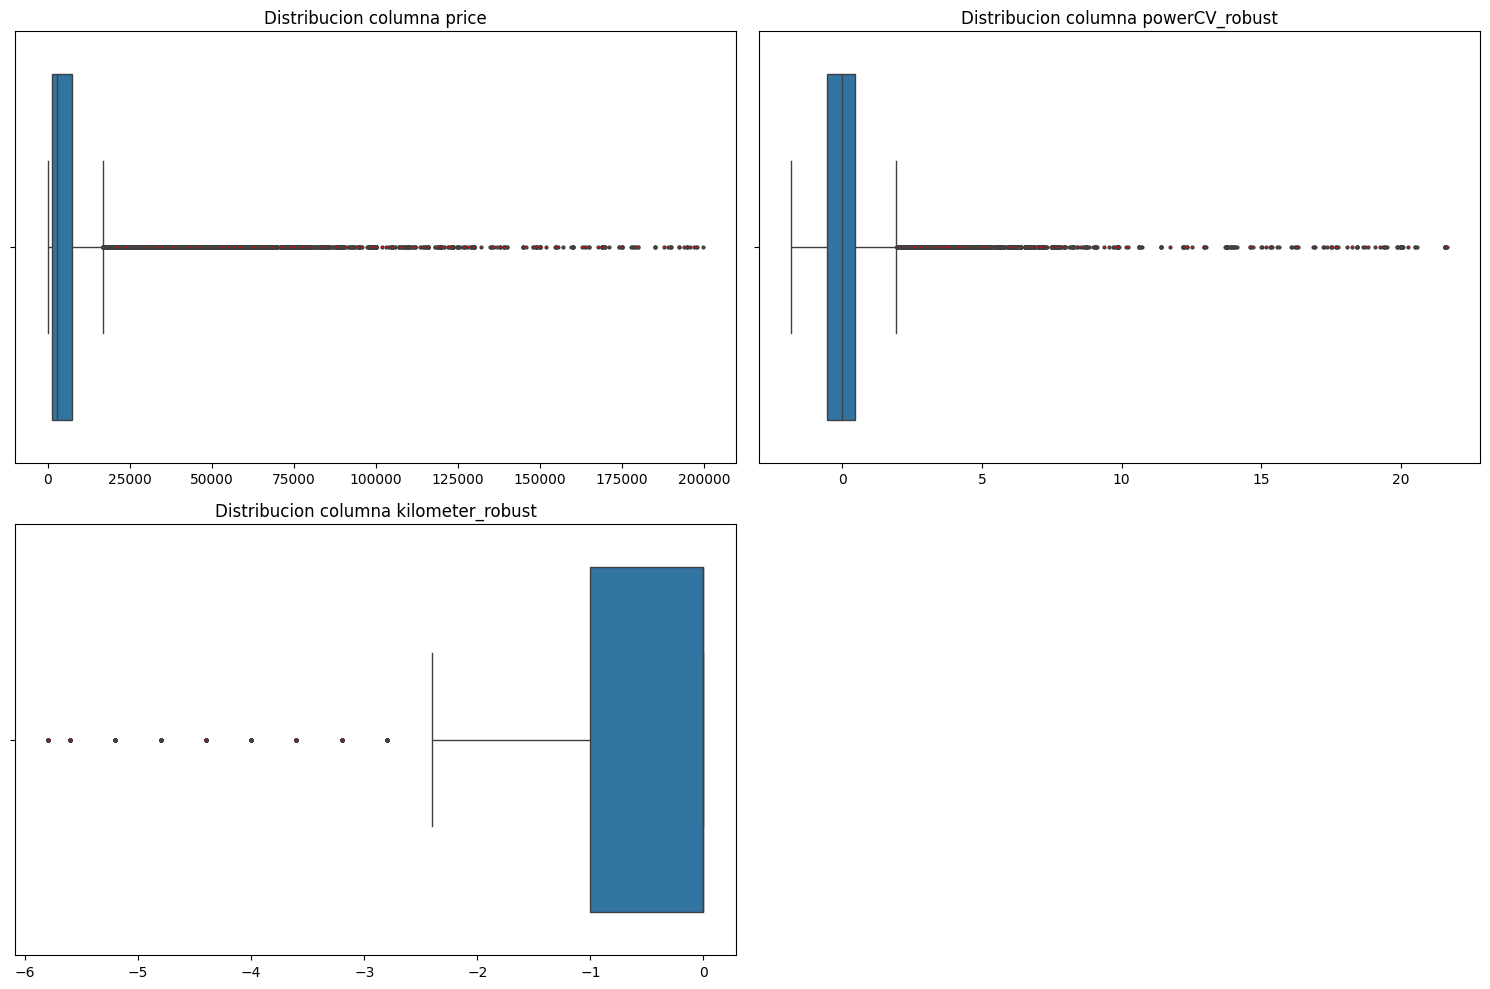

In [7]:
f.plot_outliers_univariados(df, cols_numericas, 'b', 50)

### Observaciones de las gráficas
Se puede observar que la variable precio sigue sus parámetros numéricos originales (donde solo saqué datos que consideraba erróneos). Las otras dos columnas, del formato robust, siguen su formato estandarizado que ya les apliqué.

El boxplot de kilometer solo tiene un bigote porque el otro es igual a su mínimo (Q1).

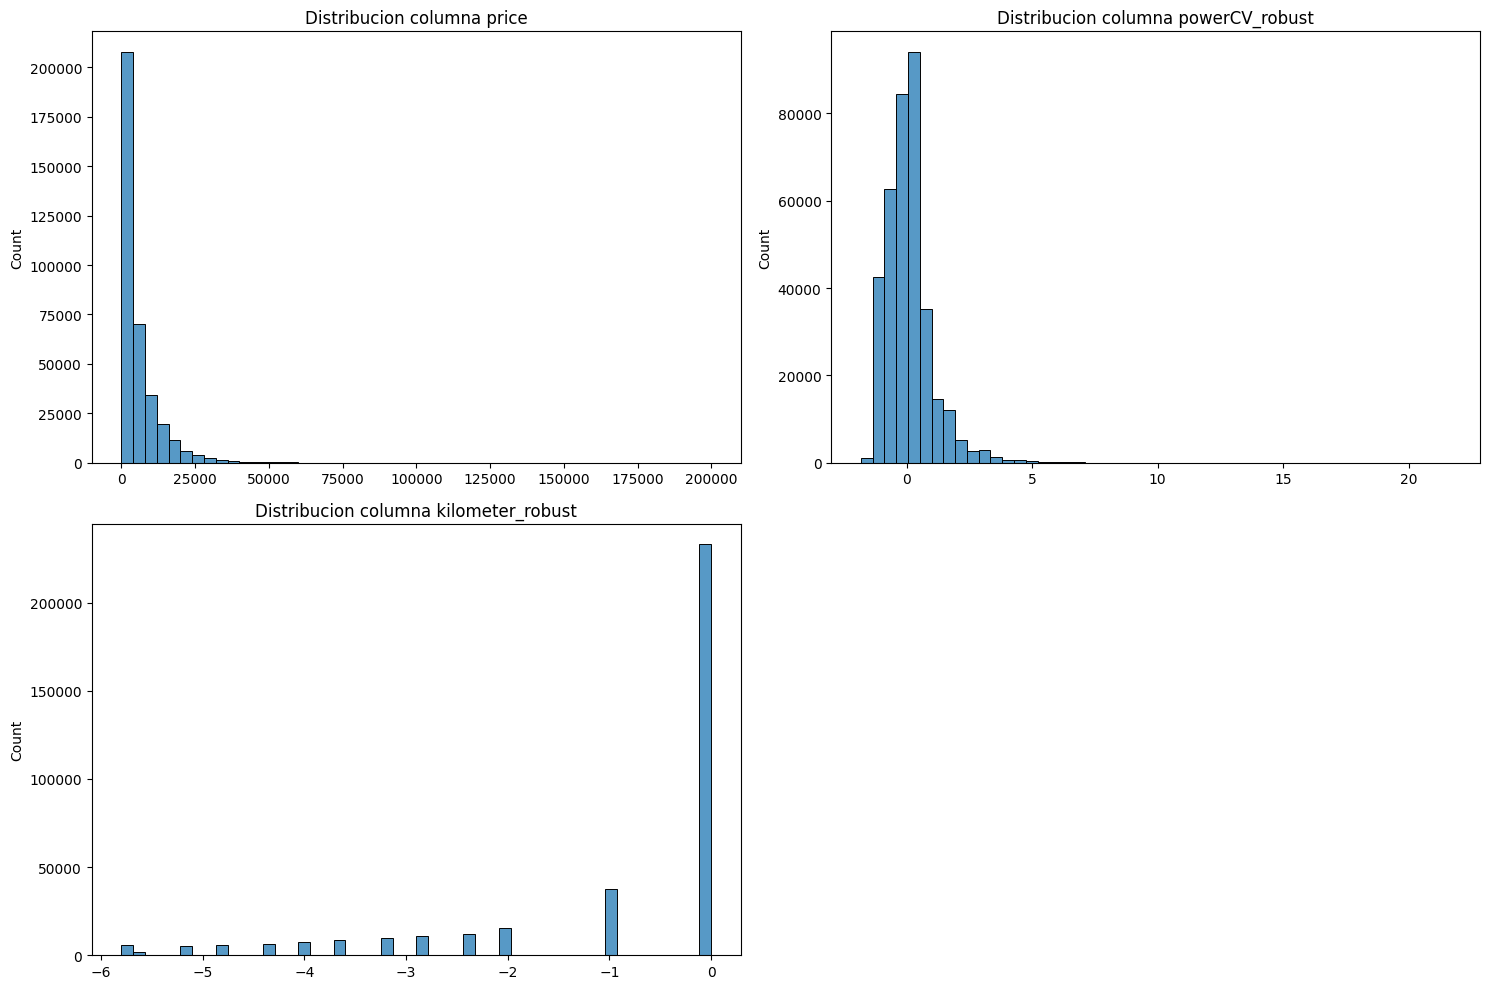

In [8]:
f.plot_outliers_univariados(df, cols_numericas, 'h', 50)

In [9]:
diccionario_resultados_outliers = f.identificar_outliers_iqr(df, cols_numericas)

La columna PRICE tiene 26123 outliers
La columna POWERCV_ROBUST tiene 13141 outliers
La columna KILOMETER_ROBUST tiene 62317 outliers


Solamente saco el IQR, porque sé que mis datos no tienen una distribución normal lo que indica que el método z-score no será una opción.

In [10]:
diccionario_resultados_outliers['kilometer_robust'].head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,model,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created
7,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,private,offer,14500,control,bus,Actuales,manually,0.047619,c_max,-4.8,8,petrol,ford,Desconocido,2016-04-04 23:42:13,2016,4
13,2016-03-21 12:57:01,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...,private,offer,17999,control,suv,Actuales,manually,1.063492,navara,-3.2,3,diesel,nissan,no,2016-04-06 07:45:42,2016,3
14,2016-03-11 21:39:15,KA_Lufthansa_Edition_450€_VB,private,offer,450,test,small car,Clasico,Desconocido,0.075206,ka,-5.8,Desconocido,petrol,ford,Desconocido,2016-03-19 08:46:47,2016,3
26,2016-03-07 12:51:23,Honda_Civic_1.4_i_VTEC_Comfort,private,offer,6900,test,Desconocido,Modernos,manually,-0.349206,civic,-3.6,11,petrol,honda,no,2016-03-26 09:44:53,2016,3
27,2016-03-09 11:56:38,Volkswagen_T3_andere,private,offer,1990,test,bus,Modernos,manually,-1.126984,transporter,-5.8,1,petrol,volkswagen,no,2016-03-10 07:44:33,2016,3


In [75]:
diccionario_resultados_outliers['price'].sample(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,model,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created
321961,2016-03-31 18:55:17,Maserati_Quattroporte,private,offer,17990,control,Desconocido,Modernos,automatic,4.365079,Desconocido,-1.0,12,petrol,sonstige_autos,no,2016-04-06 13:15:36,2016,3
2292,2016-03-21 22:51:12,BMW_X5_xDrive30d_Sportpaket_Panorama_Kamera_Ko...,private,offer,26900,control,suv,Actuales,automatic,1.936508,x_reihe,-1.0,1,diesel,bmw,no,2016-03-27 09:46:13,2016,3
309092,2016-03-09 16:37:41,Kia_Sportwagen_Spirit_mit_permutweiss_metallik,private,offer,16999,test,suv,Modernos,manually,0.222222,sportage,-1.0,10,diesel,kia,no,2016-04-07 03:47:03,2016,3
255027,2016-03-10 14:46:54,Audi_A7_3.0_TDI_quattro_S_tronic_LED_S_Line_Pl...,private,offer,30890,test,coupe,Actuales,automatic,1.936508,andere,-1.0,10,diesel,audi,no,2016-04-01 15:18:11,2016,3
152469,2016-03-30 13:49:00,BMW_535d_Touring__M_Paket__Pano__Aktivlkg.__HUD,private,offer,42900,test,combi,Actuales,automatic,3.000000,5er,-2.4,2,diesel,bmw,no,2016-04-07 04:44:45,2016,3


In [12]:
diccionario_resultados_outliers['powerCV_robust'].sample(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,model,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created
112719,2016-03-31 03:58:00,BMW_M5_DKG__Individual__Garantie_bis_04/17,private,offer,50500,control,Desconocido,Actuales,automatic,6.857143,m_reihe,-2.0,3,petrol,bmw,no,2016-04-06 02:16:41,2016,3
62506,2016-03-12 23:36:36,Golf_V_R32_*Vollaustattung**Schalensitze*,private,offer,14000,control,Desconocido,Modernos,automatic,2.015873,golf,-5.2,2,petrol,volkswagen,no,2016-03-15 17:17:09,2016,3
198613,2016-03-25 11:39:11,Ford_Focus_2.5_ST__Tausch_moeglich,private,offer,10500,test,Desconocido,Actuales,manually,2.476190,focus,-2.4,3,petrol,ford,Desconocido,2016-03-30 00:16:53,2016,3
337681,2016-03-25 10:39:16,911/997_S_Cabrio_Leder__Navi__Sportabgasanlage...,private,offer,69850,test,convertible,Modernos,manually,4.126984,911,-4.8,4,petrol,porsche,no,2016-04-06 09:46:20,2016,3
77522,2016-03-27 10:37:19,GL_420_CDI,private,offer,35450,control,suv,Modernos,automatic,2.888889,gl,-2.4,5,diesel,mercedes_benz,no,2016-03-30 15:47:41,2016,3


In [13]:
contaminacion = [0.01, 0.05, 0.1]
estimadores = [100, 1000, 2000]

combinaciones = list(product(contaminacion, estimadores))
combinaciones

[(0.01, 100),
 (0.01, 1000),
 (0.01, 2000),
 (0.05, 100),
 (0.05, 1000),
 (0.05, 2000),
 (0.1, 100),
 (0.1, 1000),
 (0.1, 2000)]

In [14]:
# for cont, esti in tqdm(combinaciones):
#     ifo = IsolationForest(random_state=42, #semilla de datos aleatorios
#                         n_estimators=esti, #numero de arboles
#                         contamination=cont,
#                         n_jobs=-1) #nucleos del ordenador

#     df[f'outliers_ifo_{cont}_{esti}'] = ifo.fit_predict(df[['price', 'powerCV_robust', 'kilometer_robust']])

Dejo la casilla anterior comentada porque la ejecuté en su momento, sé lo que me da y lo que visualiza. Sin embargo, no la dejo ejecutada en el efecto final porque al final no es algo que se le aplica a mi conjunto de datos. Estos no tienen atípicos raros y escasos, sino al contrario.

In [ ]:
# columnas_ifo = df.filter(like='outlier').columns # se queda con todas las columnas de out

In [16]:
# columnas_ifo

Index([], dtype='object')

In [18]:
combinaciones_viz = list(combinations(['price', 'powerCV_robust', 'kilometer_robust'], 2)) # hago combinaciones de 2
combinaciones_viz

[('price', 'powerCV_robust'),
 ('price', 'kilometer_robust'),
 ('powerCV_robust', 'kilometer_robust')]

In [19]:
# for outlier in columnas_ifo:
#     fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,5))

#     for indice, tupla in enumerate(combinaciones_viz):
#         sns.scatterplot(x=tupla[0],
#                         y=tupla[1], 
#                         ax=axes[indice],
#                         data=df,
#                         style=outlier,
#                         size=2,
#                         hue=outlier, #aqui miro todos mis graficos para ver cual me muestra los mejores OUTL
#                         palette='Set1')
        
#     plt.title(f'{outlier}')

Para este conjunto de datos, isolation forest no es el método correcto por lo que no proseguí con él.

In [20]:
vecinos = [25,35,50]

In [21]:
combinaciones_lof = list(product(contaminacion, vecinos))
combinaciones_lof

[(0.01, 25),
 (0.01, 35),
 (0.01, 50),
 (0.05, 25),
 (0.05, 35),
 (0.05, 50),
 (0.1, 25),
 (0.1, 35),
 (0.1, 50)]

He elegido distintos vecinos porque mis datos son variados, por lo que debo trabajar con un número de vecinos entre 25 y 50. He decidido probar con 25-35-50.

In [22]:
for cont, vec in tqdm(combinaciones_lof):
    clf = LocalOutlierFactor(n_neighbors=vec, #semilla de datos aleatorios
                        algorithm='auto',
                        contamination=cont,
                        n_jobs=-1) #nucleos del ordenador

    df[f'outliers_lof_{cont}_{vec}'] = clf.fit_predict(df[['price', 'powerCV_robust', 'kilometer_robust']])

100%|██████████| 9/9 [01:01<00:00,  6.80s/it]


In [23]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,...,month_created,outliers_lof_0.01_25,outliers_lof_0.01_35,outliers_lof_0.01_50,outliers_lof_0.05_25,outliers_lof_0.05_35,outliers_lof_0.05_50,outliers_lof_0.1_25,outliers_lof_0.1_35,outliers_lof_0.1_50
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,Desconocido,Modernos,manually,0.075206,...,3,1,1,1,1,1,1,1,1,1
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,Actuales,manually,1.063492,...,3,1,1,1,1,1,1,1,1,1
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,Modernos,automatic,0.650794,...,3,1,1,1,1,1,1,1,1,1
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,Modernos,manually,-0.730159,...,3,1,1,1,1,1,1,1,1,1
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,Modernos,manually,-0.825397,...,3,1,1,1,1,1,1,1,1,1


In [29]:
columnas_lof = df.filter(like='outlier').columns # se queda con todas las columnas de out

In [30]:
columnas_lof

Index(['outliers_lof_0.01_25', 'outliers_lof_0.01_35', 'outliers_lof_0.01_50',
       'outliers_lof_0.05_25', 'outliers_lof_0.05_35', 'outliers_lof_0.05_50',
       'outliers_lof_0.1_25', 'outliers_lof_0.1_35', 'outliers_lof_0.1_50'],
      dtype='object')

Saqué mis columnas para el posterior análisis.

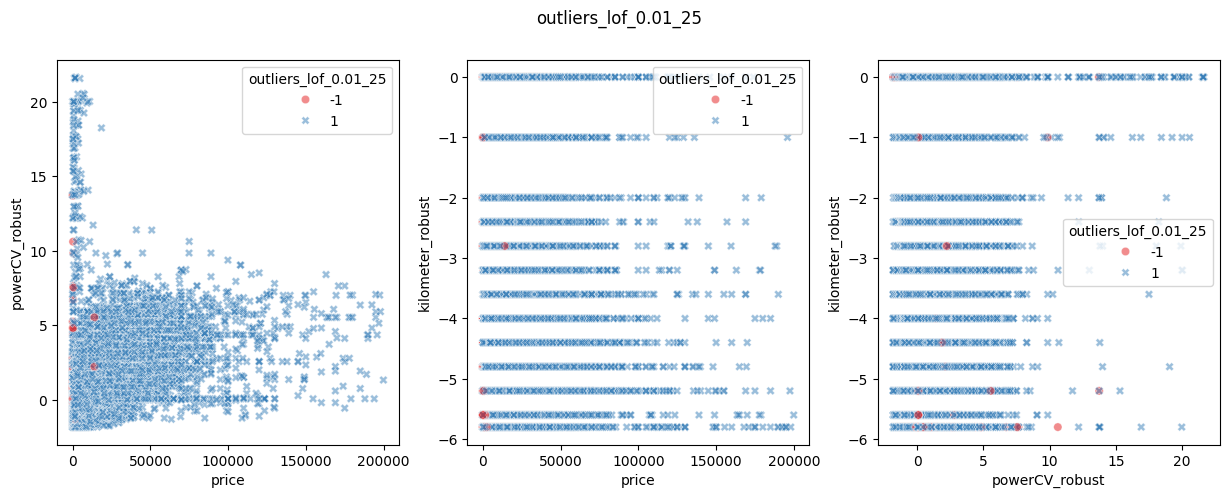

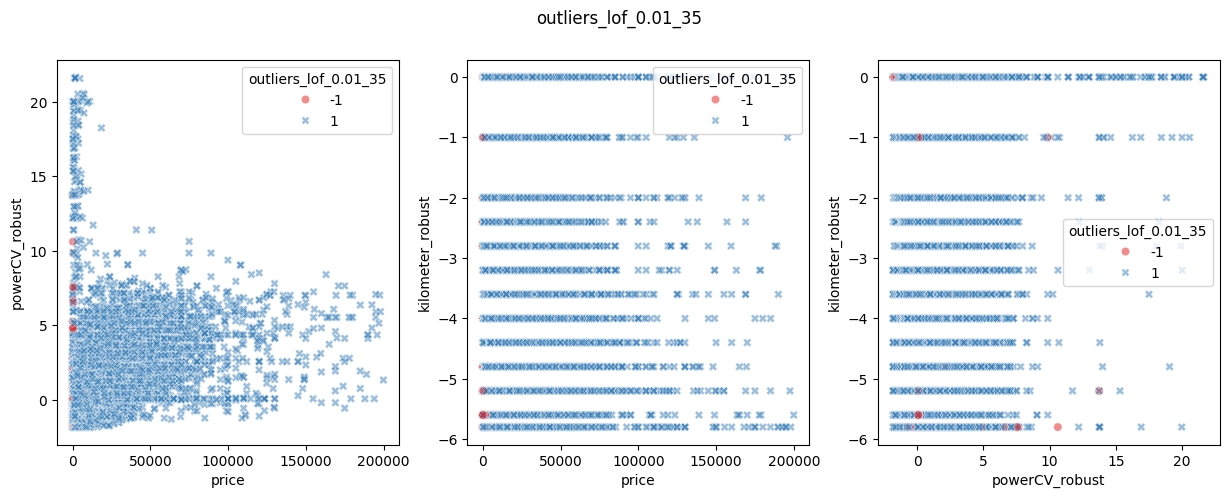

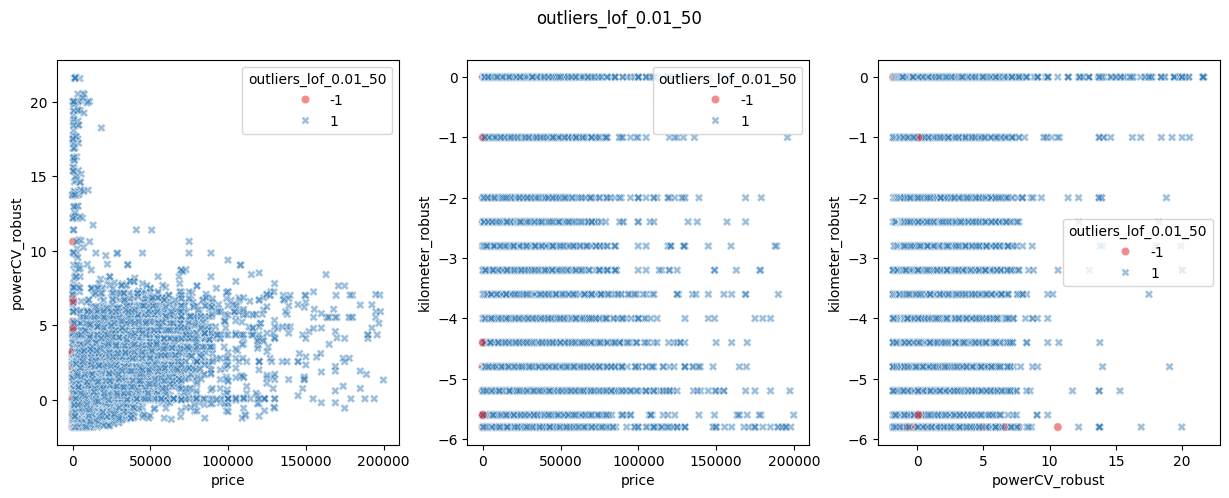

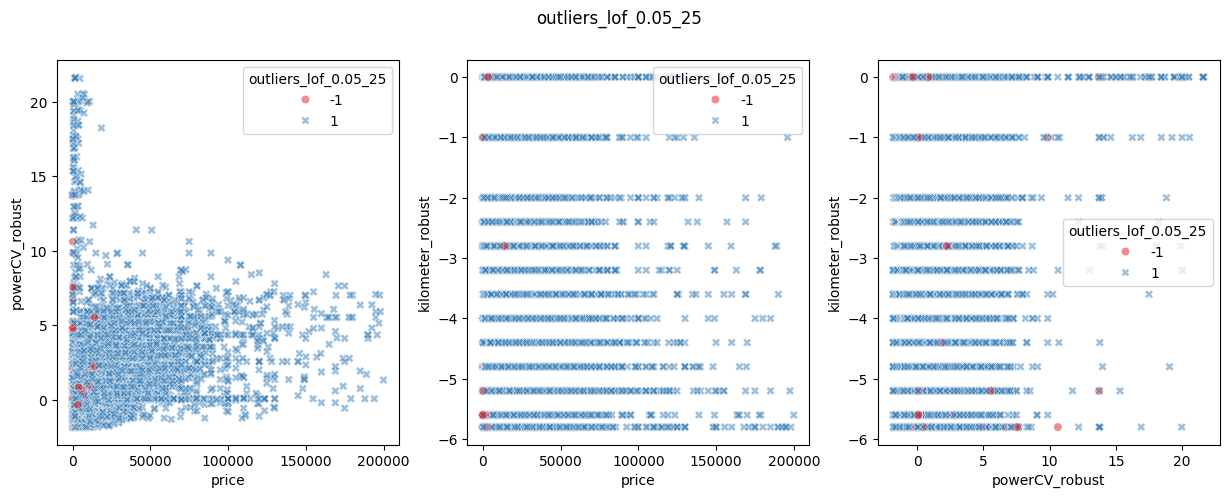

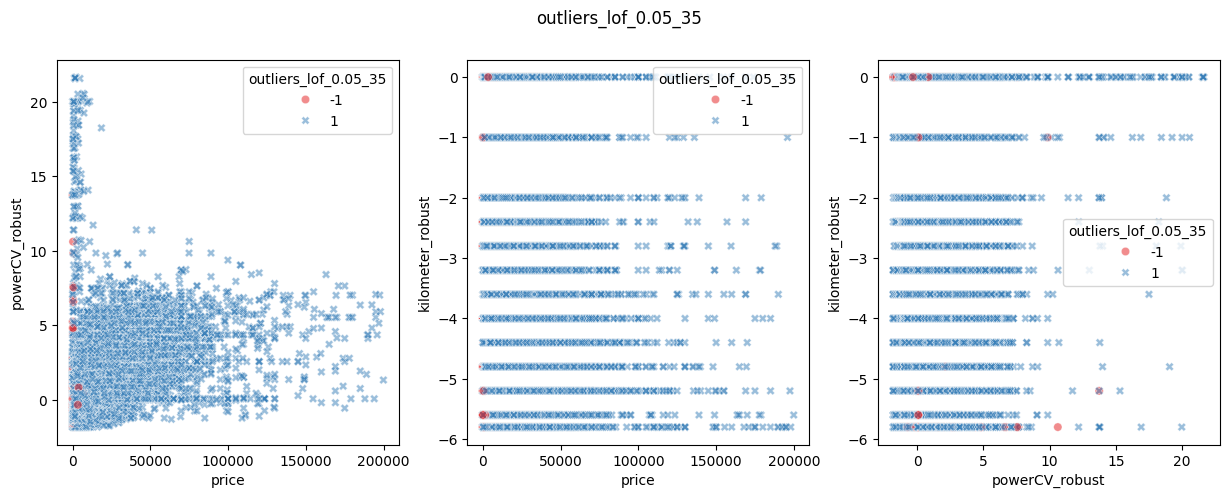

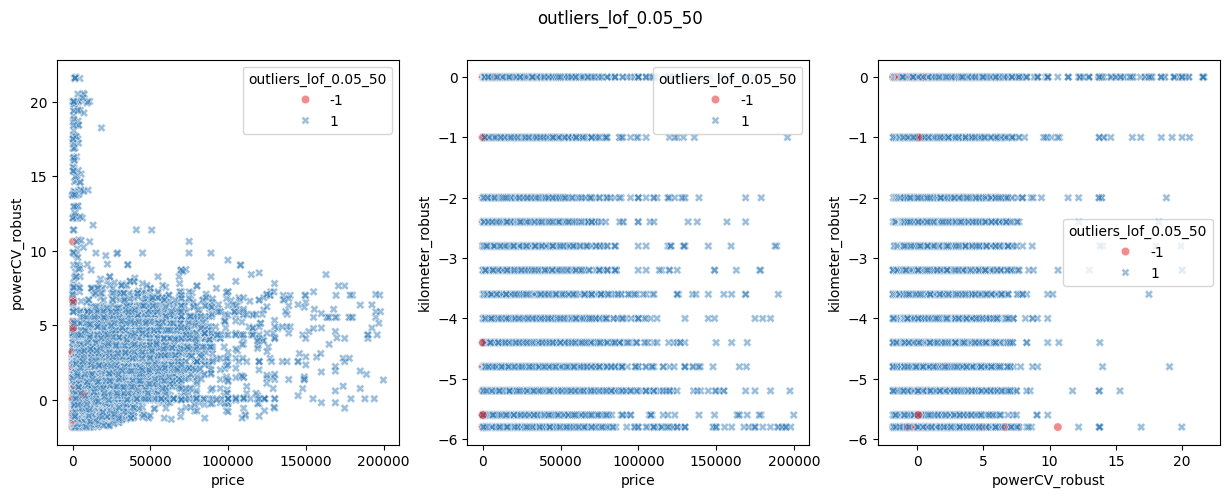

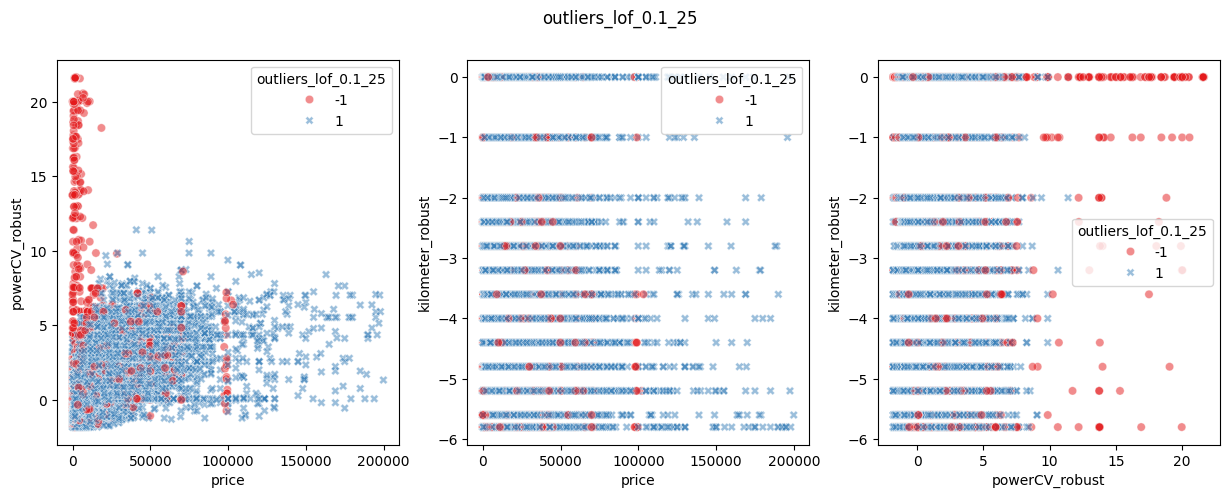

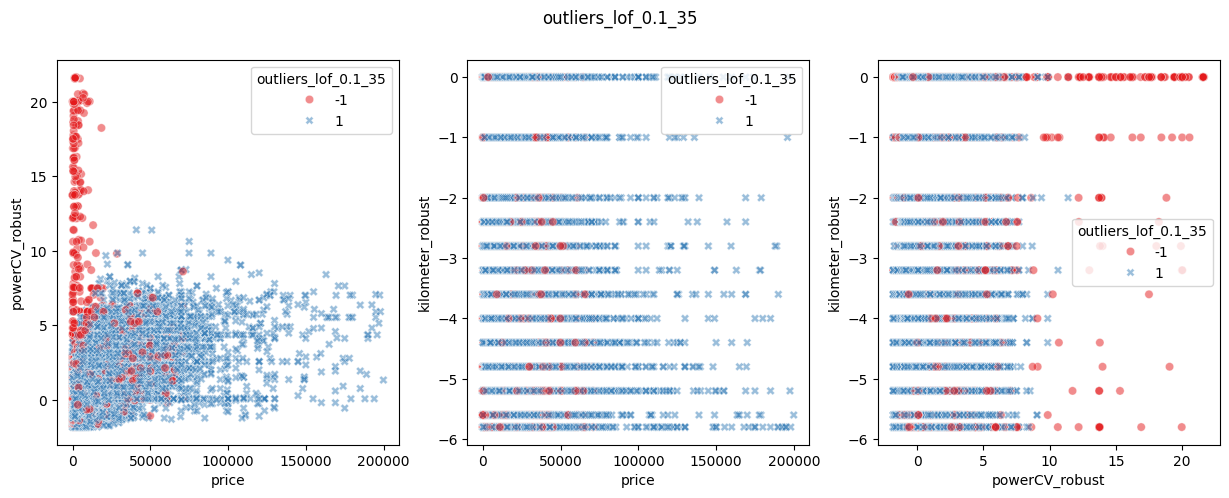

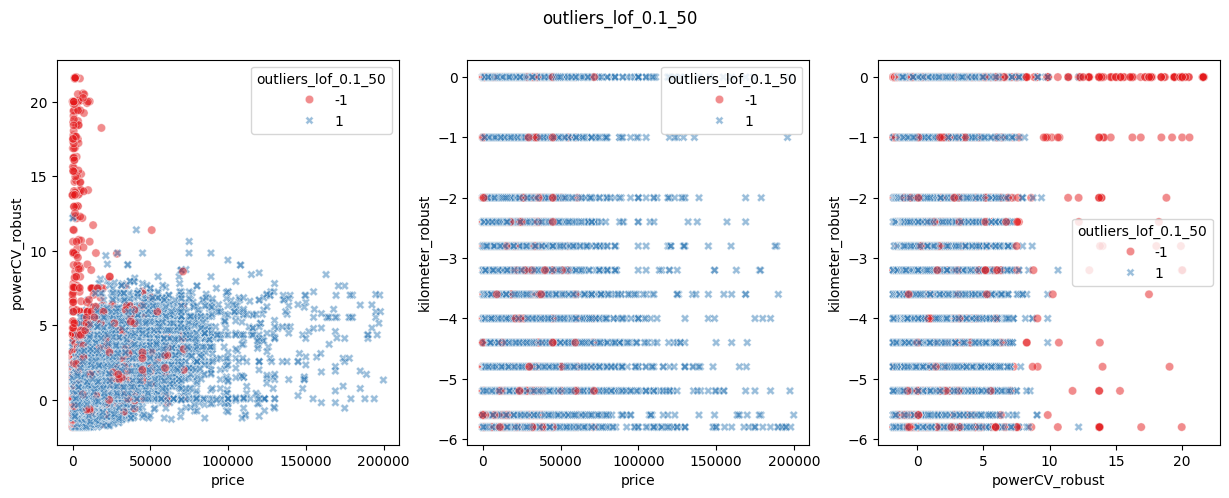

In [31]:
for outlier in columnas_lof:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15, 5))
    axes = axes.flat

    for indice, tupla in enumerate(combinaciones_viz):
        sns.scatterplot(x = tupla[0],
                        y = tupla[1],
                        ax = axes[indice],
                        data = df,
                        hue=outlier,
                        palette="Set1",
                        style=outlier,
                        alpha=0.5)

    plt.suptitle(outlier)

Mis visualizaciones tienen una explicación lógica: mientras tuvieron un índice de contaminación bajo, los outliers no se hacían tan presentes. Sin embargo, al tener un índice de 10%, aparecieron los outliers. A la vez, al tener más vecinos para comparar el número de outliers iba decayendo ligeramente.

In [41]:
df.describe()

,price,powerCV_robust,kilometer_robust,outliers_lof_0.01_25,outliers_lof_0.01_35,outliers_lof_0.01_50,outliers_lof_0.05_25,outliers_lof_0.05_35,outliers_lof_0.05_50,outliers_lof_0.1_25,outliers_lof_0.1_35,outliers_lof_0.1_50
count,360574.000000,360574.000000,360574.000000,360574.000000,360574.000000,360574.000000,360574.000000,360574.000000,360574.000000,360574.000000,360574.000000,360574.000000
mean,5858.772654,0.075206,-0.972387,0.980004,0.980004,0.979999,0.899998,0.900043,0.900015,0.799997,0.799997,0.799997
std,8261.664458,0.974926,1.592025,0.198978,0.198978,0.199005,0.435894,0.435802,0.435860,0.600005,0.600005,0.600005
min,1.000000,-1.825397,-5.800000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1250.000000,-0.555556,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3000.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,7490.000000,0.444444,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,199900.000000,21.666667,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Tomaré las filas donde los outliers han sido señaladas en todas columnas como -1, son 982. Esto representa menos de un 0.02%. Por lo tanto me puedo permitir eliminar estos datos.

In [ ]:
filtered_df = df[(df[columnas_lof] == -1).all(axis=1)]

In [39]:
filtered_df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,model,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created,outliers_lof_0.01_25,outliers_lof_0.01_35,outliers_lof_0.01_50,outliers_lof_0.05_25,outliers_lof_0.05_35,outliers_lof_0.05_50,outliers_lof_0.1_25,outliers_lof_0.1_35,outliers_lof_0.1_50
311,2016-03-21 14:38:37,Tauache_90ccm_roller_gegen_auto,private,offer,200,control,Desconocido,Modernos,Desconocido,0.075206,Desconocido,-5.6,Desconocido,Desconocido,sonstige_autos,Desconocido,2016-03-24 02:47:34,2016,3,-1,-1,-1,-1,-1,-1,-1,-1,-1
980,2016-03-23 14:52:40,Renault_Twingo_1.3,private,offer,710,test,small car,Modernos,manually,-1.063492,twingo,0.0,11,petrol,renault,no,2016-03-26 08:15:30,2016,3,-1,-1,-1,-1,-1,-1,-1,-1,-1
1434,2016-03-08 14:58:51,A4_1.9_TDI_FULL_LEDER_BRAUN_131_PS,private,offer,2001,test,combi,Modernos,manually,0.142857,a4,0.0,10,diesel,audi,Desconocido,2016-03-08 15:39:38,2016,3,-1,-1,-1,-1,-1,-1,-1,-1,-1
1859,2016-03-06 11:47:58,Golf_V_top,private,offer,3501,test,Desconocido,Actuales,manually,-0.301587,golf,0.0,Desconocido,petrol,volkswagen,Desconocido,2016-03-13 02:17:34,2016,3,-1,-1,-1,-1,-1,-1,-1,-1,-1
2033,2016-03-28 21:06:39,Volkswagen_Lupo_1.0,private,offer,1001,test,small car,Modernos,manually,-1.126984,lupo,0.0,1,petrol,volkswagen,no,2016-04-07 06:44:55,2016,3,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [40]:
filtered_df.shape

(982, 28)

In [42]:
filtered_df.describe()

,price,powerCV_robust,kilometer_robust,outliers_lof_0.01_25,outliers_lof_0.01_35,outliers_lof_0.01_50,outliers_lof_0.05_25,outliers_lof_0.05_35,outliers_lof_0.05_50,outliers_lof_0.1_25,outliers_lof_0.1_35,outliers_lof_0.1_50
count,982.000000,982.000000,982.000000,982.0,982.0,982.0,982.0,982.0,982.0,982.0,982.0,982.0
mean,1115.310591,-0.026048,-1.503259,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
std,1215.237410,0.761532,2.414223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,-1.825397,-5.800000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
25%,299.000000,-0.317460,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,690.000000,0.075206,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
75%,1679.000000,0.222222,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
max,8008.000000,10.619048,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [47]:
df.shape

(360574, 28)

In [ ]:
df_result = df[~df.index.isin(filtered_df.index)]

In [50]:
df_result.shape

(359592, 28)

In [76]:
df_result[df_result['outliers_lof_0.1_25'] == -1]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,model,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created,outliers_lof_0.01_25,outliers_lof_0.01_35,outliers_lof_0.01_50,outliers_lof_0.05_25,outliers_lof_0.05_35,outliers_lof_0.05_50,outliers_lof_0.1_25,outliers_lof_0.1_35,outliers_lof_0.1_50
29,2016-04-03 15:48:11,Mercedes_Benz_E_250_D_Original_Zustand_!!,private,offer,3300,test,Desconocido,Modernos,automatic,-0.142857,e_klasse,0.0,1,diesel,mercedes_benz,no,2016-04-05 15:16:05,2016,4,1,1,1,-1,-1,-1,-1,-1,-1
31,2016-03-15 20:59:01,Golf_3_....._1.4,private,offer,245,test,Desconocido,Modernos,Desconocido,0.075206,golf,0.0,2,petrol,volkswagen,no,2016-03-17 18:17:43,2016,3,1,1,1,1,1,1,-1,-1,-1
51,2016-03-29 18:53:48,Bmw_318_d_Sport_Edition_Facelift,private,offer,7999,control,Desconocido,Modernos,automatic,0.333333,3er,0.0,12,diesel,bmw,Desconocido,2016-04-06 04:45:54,2016,3,1,1,1,-1,-1,-1,-1,-1,-1
54,2016-03-21 01:59:07,BMW_435i_Sport_coupe,private,offer,39600,test,coupe,Actuales,automatic,2.888889,andere,-4.8,7,petrol,bmw,no,2016-04-03 23:16:31,2016,3,1,1,1,1,1,1,-1,-1,-1
59,2016-03-26 07:54:29,Bmw_316i_compact.____200€,private,offer,200,test,coupe,Modernos,manually,-0.301587,3er,0.0,4,petrol,bmw,Desconocido,2016-04-01 20:46:51,2016,3,1,1,1,1,1,1,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360515,2016-04-04 19:45:30,VW_Golf_II,private,offer,1550,test,small car,Modernos,manually,-1.063492,golf,0.0,11,petrol,volkswagen,no,2016-04-06 21:46:44,2016,4,1,1,1,-1,1,1,-1,1,1
360516,2016-03-10 21:54:56,Renanult_MEGANE_1.5dCi_GRANDTOUR_*KLIMA*CD_RAD...,private,offer,2600,control,combi,Modernos,manually,-0.285714,megane,0.0,1,diesel,renault,no,2016-03-12 14:16:31,2016,3,1,1,1,1,-1,-1,-1,-1,-1
360548,2016-03-26 18:36:54,Chrysler_Voyager,private,offer,3900,test,bus,Modernos,automatic,0.825397,voyager,0.0,7,petrol,chrysler,no,2016-04-06 09:16:04,2016,3,1,1,1,-1,-1,1,-1,-1,1
360557,2016-03-06 21:11:23,Mercedes_benz_e_klasse_avangarde_220_cdi_grune...,private,offer,6500,test,Desconocido,Modernos,automatic,0.365079,e_klasse,0.0,3,diesel,mercedes_benz,no,2016-03-12 12:18:05,2016,3,1,1,1,-1,1,-1,-1,1,-1


In [82]:
df_result.describe()

,price,powerCV_robust,kilometer_robust,outliers_lof_0.01_25,outliers_lof_0.01_35,outliers_lof_0.01_50,outliers_lof_0.05_25,outliers_lof_0.05_35,outliers_lof_0.05_50,outliers_lof_0.1_25,outliers_lof_0.1_35,outliers_lof_0.1_50
count,359592.000000,359592.000000,359592.000000,359592.000000,359592.000000,359592.000000,359592.000000,359592.000000,359592.000000,359592.000000,359592.000000,359592.000000
mean,5871.726446,0.075483,-0.970938,0.985411,0.985411,0.985406,0.905187,0.905231,0.905204,0.804912,0.804912,0.804912
std,8268.969312,0.975432,1.588960,0.170190,0.170190,0.170223,0.425014,0.424919,0.424979,0.593395,0.593395,0.593395
min,1.000000,-1.825397,-5.800000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1250.000000,-0.555556,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3000.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,7499.000000,0.444444,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,199900.000000,21.666667,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


El dataframe df_result es el original luego de quitarle los valores del dataframe donde todas sus columnas son -1.

In [ ]:
threshold = 0.6 * len(columnas_lof)
df_outliers_60_percent = df_result[df_result[columnas_lof].eq(-1).sum(axis=1) >= threshold]

## EDA

In [81]:
f.exploracion_dataframe(df_outliers_60_percent, 'price')

El número de datos es 6561 y el de columnas es 28

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
dateCrawled,object
name,object
seller,object
offerType,object
price,int64
abtest,object
vehicleType,object
yearOfRegistration,object
gearbox,object
powerCV_robust,float64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna dateCrawled tiene las siguientes valore únicos:


,count
dateCrawled,
2016-03-27 22:56:40,2
2016-03-12 15:46:28,2
2016-03-31 15:57:05,2
2016-04-06 12:06:36,2
2016-03-28 18:45:38,2
...,...
2016-03-17 00:58:20,1
2016-03-17 13:51:51,1
2016-03-25 19:55:34,1


La columna name tiene las siguientes valore únicos:


,count
name,
A4_Avant_1.9_TDI_MMI_TV_Bose_DPF_Xenon_Carbon,22
Renault_Twingo,20
Opel_Corsa,20
Opel_Signum_2.2,18
Opel_Astra_2.2_16V_Coupe,16
...,...
verkaufen_golf_4,1
Mercedes_Benz_E_230_T_Avantgarde_XENON_LEDER_AUTOMATIK,1
Audi_100_Typ_44_Turbo_Sport,1


La columna seller tiene las siguientes valore únicos:


,count
seller,
private,6561


La columna offerType tiene las siguientes valore únicos:


,count
offerType,
offer,6561


La columna abtest tiene las siguientes valore únicos:


,count
abtest,
test,3310
control,3251


La columna vehicleType tiene las siguientes valore únicos:


,count
vehicleType,
Desconocido,2169
small car,1498
combi,1206
bus,732
coupe,323
convertible,280
suv,271
other,82


La columna yearOfRegistration tiene las siguientes valore únicos:


,count
yearOfRegistration,
Modernos,5956
Actuales,560
Retro,35
Desconocido,9
Clasico,1


La columna gearbox tiene las siguientes valore únicos:


,count
gearbox,
manually,5317
automatic,948
Desconocido,296


La columna model tiene las siguientes valore únicos:


,count
model,
andere,872
Desconocido,391
golf,291
astra,260
corsa,246
...,...
lodgy,1
a1,1
delta,1


La columna monthOfRegistration tiene las siguientes valore únicos:


,count
monthOfRegistration,
Desconocido,841
3,609
6,581
5,555
4,520
7,451
10,448
1,442
12,439


La columna fuelType tiene las siguientes valore únicos:


,count
fuelType,
petrol,4182
diesel,1482
Desconocido,739
lpg,140
cng,15
hybrid,1
electro,1
other,1


La columna brand tiene las siguientes valore únicos:


,count
brand,
opel,1014
volkswagen,921
ford,576
mercedes_benz,538
renault,472
audi,392
bmw,351
fiat,335
peugeot,223


La columna notRepairedDamage tiene las siguientes valore únicos:


,count
notRepairedDamage,
no,3866
Desconocido,1504
yes,1191


La columna lastSeen tiene las siguientes valore únicos:


,count
lastSeen,
2016-04-07 14:57:15,3
2016-04-07 02:17:16,3
2016-04-06 23:17:15,3
2016-04-06 19:18:11,3
2016-04-06 15:46:09,3
...,...
2016-04-06 04:45:33,1
2016-03-20 01:46:42,1
2016-04-02 23:44:43,1


### EDA - Análisis

- No tengo nulos ni duplicados.
- Tengo 6561 datos que se categorizan como outliers en al menos un 60% de los casos

In [70]:
df_outliers_60_percent.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,model,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created,outliers_lof_0.01_25,outliers_lof_0.01_35,outliers_lof_0.01_50,outliers_lof_0.05_25,outliers_lof_0.05_35,outliers_lof_0.05_50,outliers_lof_0.1_25,outliers_lof_0.1_35,outliers_lof_0.1_50
29,2016-04-03 15:48:11,Mercedes_Benz_E_250_D_Original_Zustand_!!,private,offer,3300,test,Desconocido,Modernos,automatic,-0.142857,e_klasse,0.0,1,diesel,mercedes_benz,no,2016-04-05 15:16:05,2016,4,1,1,1,-1,-1,-1,-1,-1,-1
51,2016-03-29 18:53:48,Bmw_318_d_Sport_Edition_Facelift,private,offer,7999,control,Desconocido,Modernos,automatic,0.333333,3er,0.0,12,diesel,bmw,Desconocido,2016-04-06 04:45:54,2016,3,1,1,1,-1,-1,-1,-1,-1,-1
88,2016-03-07 17:38:57,Renault_Scenic,private,offer,2990,test,bus,Modernos,manually,-0.142857,scenic,0.0,12,petrol,renault,no,2016-03-09 06:15:31,2016,3,1,1,1,-1,-1,-1,-1,-1,-1
115,2016-04-04 09:50:15,Volkswagen_Corrado_1.8_G60,private,offer,3500,control,coupe,Modernos,manually,0.603175,andere,0.0,5,petrol,volkswagen,no,2016-04-06 11:17:02,2016,4,1,1,1,-1,-1,-1,-1,-1,-1
117,2016-04-03 12:45:29,Honda_Jazz_1.2_S,private,offer,1699,control,small car,Modernos,manually,-0.698413,jazz,0.0,8,petrol,honda,no,2016-04-07 14:57:35,2016,4,1,1,1,-1,-1,-1,-1,-1,-1


In [85]:
df_evaluar = df_outliers_60_percent[(df_outliers_60_percent['yearOfRegistration'] == 'Actuales') & (df_outliers_60_percent['price'] < 2000)]

In [89]:
df_evaluar.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,model,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created,outliers_lof_0.01_25,outliers_lof_0.01_35,outliers_lof_0.01_50,outliers_lof_0.05_25,outliers_lof_0.05_35,outliers_lof_0.05_50,outliers_lof_0.1_25,outliers_lof_0.1_35,outliers_lof_0.1_50
167060,2016-03-22 15:50:11,Polo_6n_mit_TÜV_u._Schiebedach__Haesslich_aber...,private,offer,600,control,Desconocido,Actuales,manually,-1.333333,polo,0.0,5,petrol,volkswagen,Desconocido,2016-03-25 08:15:57,2016,3,1,-1,-1,-1,-1,-1,-1,-1,-1
216473,2016-03-05 14:15:13,Ford_Mondeo_MK2_Limo_2_5_l_V6_170_PS_Silber,private,offer,400,test,Desconocido,Actuales,automatic,0.761905,mondeo,0.0,Desconocido,Desconocido,ford,yes,2016-03-31 03:45:56,2016,3,1,-1,1,-1,-1,1,-1,-1,-1
279544,2016-03-19 17:48:05,Renault_Twingo___neue_Bremsen_neue_Batterie,private,offer,800,control,Desconocido,Actuales,manually,-1.000000,twingo,-1.0,6,petrol,renault,no,2016-03-21 23:45:35,2016,3,1,1,1,-1,-1,-1,-1,-1,-1
151650,2016-04-02 04:36:17,Ford_Fiesta__Klima_Tuev_01.2018,private,offer,1199,control,Desconocido,Actuales,manually,0.075206,fiesta,-1.0,11,petrol,ford,Desconocido,2016-04-06 06:44:37,2016,4,1,-1,-1,1,-1,-1,1,-1,-1
338623,2016-03-16 13:36:57,Verkaufe_BMW_e34,private,offer,250,control,Desconocido,Actuales,manually,0.111111,Desconocido,0.0,Desconocido,Desconocido,bmw,yes,2016-03-16 14:41:34,2016,3,1,1,1,-1,-1,-1,-1,-1,-1
158038,2016-03-10 20:47:45,Verkauf_bastler_tub.bis.13.3.2016.,private,offer,150,test,Desconocido,Actuales,Desconocido,0.206349,scenic,0.0,Desconocido,Desconocido,renault,Desconocido,2016-03-13 03:46:20,2016,3,1,-1,-1,-1,-1,-1,-1,-1,-1
351872,2016-04-01 19:51:25,Verkaufe_Kia_Retona,private,offer,1100,control,Desconocido,Actuales,manually,0.095238,Desconocido,0.0,12,Desconocido,kia,Desconocido,2016-04-01 19:51:25,2016,4,1,1,1,-1,-1,-1,-1,-1,-1
74439,2016-03-22 11:49:01,Focus_st_schweller_links,private,offer,50,control,Desconocido,Actuales,manually,2.015873,focus,-5.2,1,Desconocido,ford,no,2016-04-06 00:15:56,2016,3,-1,-1,1,-1,-1,1,-1,-1,-1
343279,2016-04-04 18:49:58,Tausche_Opel_Corsa_C_Gsi_125ps/tuev_neu,private,offer,1,test,Desconocido,Actuales,manually,0.047619,corsa,0.0,7,petrol,opel,no,2016-04-04 18:49:58,2016,4,1,1,1,-1,-1,-1,-1,-1,-1
162641,2016-04-02 13:47:23,Mercedes__190er__6_Zylinder__w201__2_6l,private,offer,900,test,Desconocido,Actuales,manually,0.603175,c_klasse,0.0,Desconocido,petrol,mercedes_benz,yes,2016-04-06 12:15:54,2016,4,1,1,-1,1,-1,-1,-1,-1,-1


<Axes: xlabel='price'>

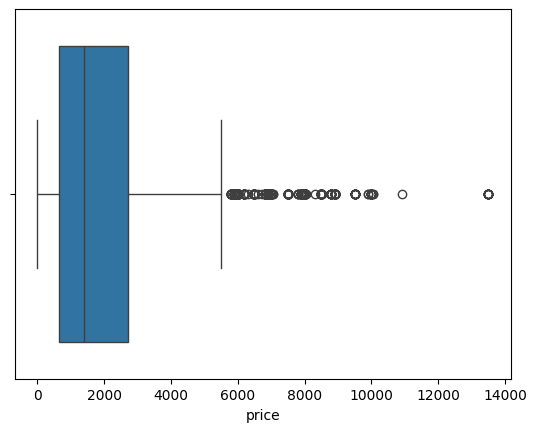

In [56]:
sns.boxplot(x='price', data=df_outliers_60_percent)

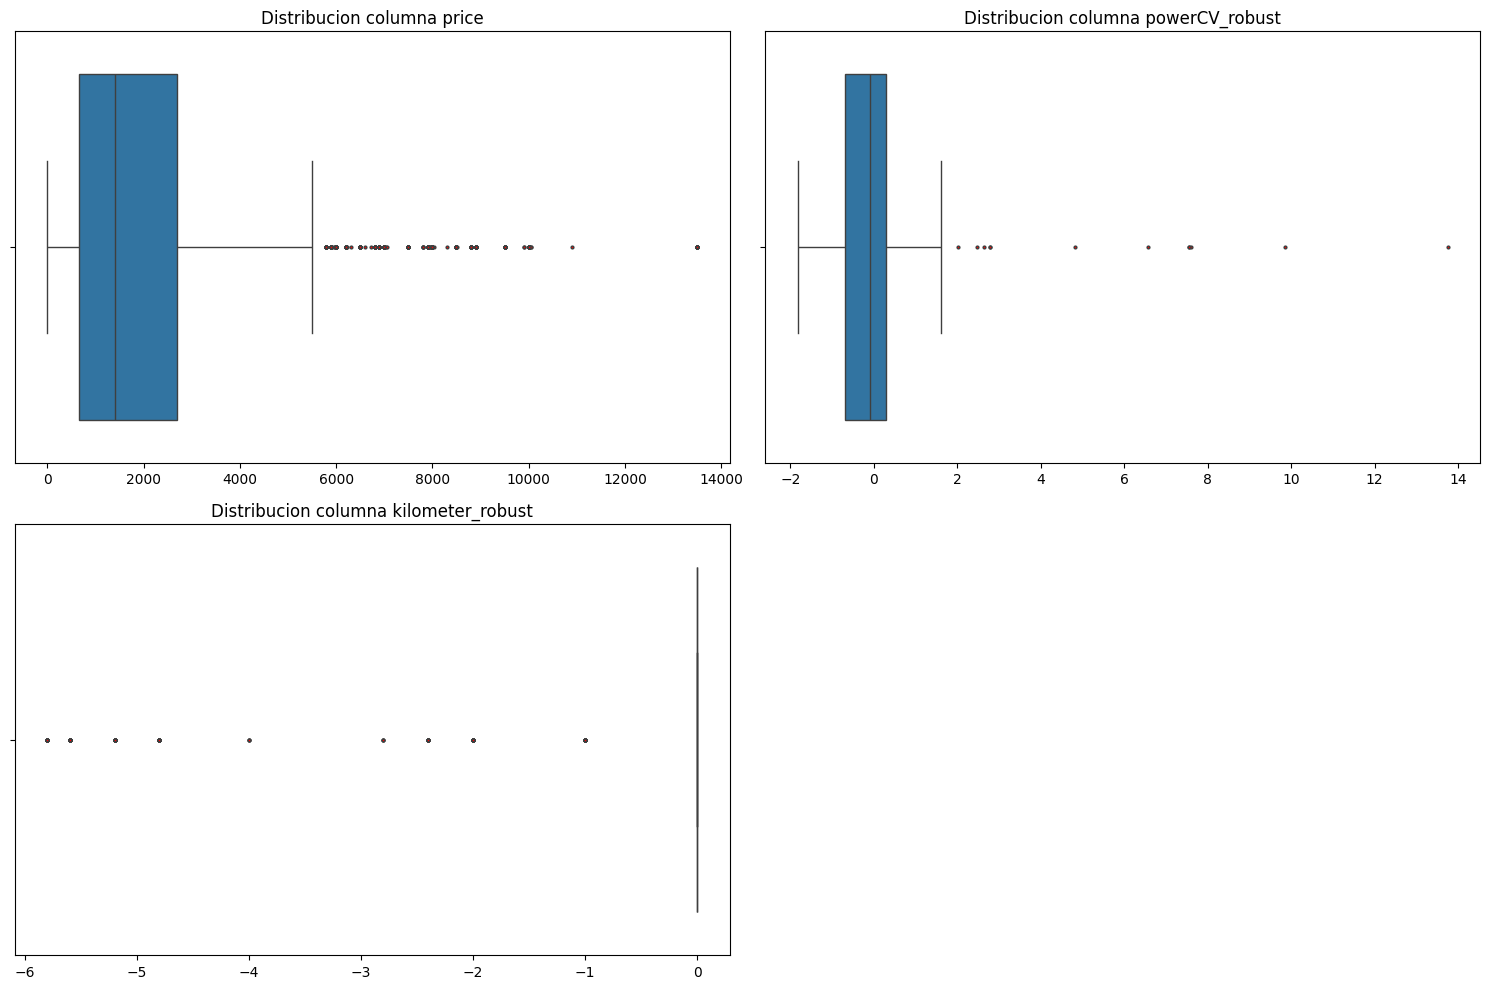

In [92]:
f.plot_outliers_univariados(df_outliers_60_percent, cols_numericas, 'b', 50)

In [72]:
df_outliers_60_percent[df_outliers_60_percent['price'] > 6000]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,model,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created,outliers_lof_0.01_25,outliers_lof_0.01_35,outliers_lof_0.01_50,outliers_lof_0.05_25,outliers_lof_0.05_35,outliers_lof_0.05_50,outliers_lof_0.1_25,outliers_lof_0.1_35,outliers_lof_0.1_50
51,2016-03-29 18:53:48,Bmw_318_d_Sport_Edition_Facelift,private,offer,7999,control,Desconocido,Modernos,automatic,0.333333,3er,0.0,12,diesel,bmw,Desconocido,2016-04-06 04:45:54,2016,3,1,1,1,-1,-1,-1,-1,-1,-1
3573,2016-03-07 12:54:15,Mercedes_Benz_CE_230_Oldtimer_LPG_Gas,private,offer,6900,test,coupe,Modernos,automatic,0.222222,andere,0.0,10,lpg,mercedes_benz,no,2016-04-05 20:16:42,2016,3,1,1,1,-1,-1,-1,-1,-1,-1
3782,2016-03-17 00:27:07,BMW_325i_E30_4Tuer._MTechnik_2,private,offer,8500,test,Desconocido,Modernos,manually,0.777778,3er,0.0,12,petrol,bmw,Desconocido,2016-03-20 21:45:54,2016,3,1,1,1,-1,-1,-1,-1,-1,-1
5358,2016-03-29 18:56:35,BMW_318_Ci_Cabriolet_im_top_Zustand,private,offer,6999,control,convertible,Modernos,manually,0.333333,3er,0.0,4,petrol,bmw,no,2016-04-06 04:45:59,2016,3,1,1,1,-1,-1,-1,-1,-1,-1
5551,2016-04-04 16:47:25,Mercedes_Benz_E_220_T_CDI_Automatik_Avantgarde...,private,offer,8799,test,combi,Modernos,automatic,0.761905,e_klasse,0.0,9,diesel,mercedes_benz,no,2016-04-06 18:45:28,2016,4,-1,-1,1,-1,-1,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357533,2016-03-25 18:45:23,Opel_Frontera_2.2_16V,private,offer,6500,test,suv,Modernos,manually,0.222222,andere,0.0,4,petrol,opel,no,2016-04-07 00:16:55,2016,3,1,1,1,-1,-1,-1,-1,-1,-1
358381,2016-03-22 20:56:25,Fiat_2.0_multijet_Diesel,private,offer,7000,control,bus,Actuales,manually,0.222222,andere,0.0,1,diesel,fiat,no,2016-03-30 03:45:11,2016,3,1,1,1,-1,-1,-1,-1,-1,-1
358659,2016-03-17 19:45:17,BMW__318i_Aut._Klimaautomatik_Navi_Facelift,private,offer,8900,control,Desconocido,Modernos,automatic,0.333333,3er,0.0,10,petrol,bmw,no,2016-04-01 11:15:41,2016,3,1,1,1,-1,-1,-1,-1,-1,-1
359258,2016-03-16 11:42:16,Opel_Vivaro_2.5_CDTI_L1H1,private,offer,6900,test,bus,Modernos,manually,0.222222,vivaro,0.0,10,diesel,opel,no,2016-03-19 07:46:26,2016,3,1,1,1,-1,-1,-1,-1,-1,-1


In [90]:
df_outliers_60_percent.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,model,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created,outliers_lof_0.01_25,outliers_lof_0.01_35,outliers_lof_0.01_50,outliers_lof_0.05_25,outliers_lof_0.05_35,outliers_lof_0.05_50,outliers_lof_0.1_25,outliers_lof_0.1_35,outliers_lof_0.1_50
176990,2016-03-06 11:47:04,Mitsubishi_Carisma_Avance,private,offer,350,test,Desconocido,Modernos,manually,-0.412698,carisma,0.0,6,petrol,mitsubishi,no,2016-03-07 13:44:36,2016,3,1,1,-1,-1,-1,-1,-1,-1,-1
86672,2016-03-14 14:50:59,A4_Avant_1.9_TDI_MMI_TV_Bose_DPF_Xenon_Carbon,private,offer,2210,control,combi,Modernos,manually,0.142857,a4,0.0,11,diesel,audi,Desconocido,2016-03-14 14:50:59,2016,3,1,-1,-1,1,-1,-1,1,-1,-1
12031,2016-03-08 15:51:51,De_auto_is_noch_an_gemeldet,private,offer,3500,test,Desconocido,Modernos,manually,0.206349,c_klasse,0.0,12,diesel,mercedes_benz,Desconocido,2016-04-06 20:18:53,2016,3,1,1,1,-1,-1,-1,-1,-1,-1
110673,2016-03-22 10:50:34,Dacia_Lodgy_dCi_110_Prestige_mit_Taxi_Vollauss...,private,offer,5500,control,bus,Actuales,manually,-0.222222,lodgy,0.0,10,diesel,dacia,no,2016-03-31 06:17:39,2016,3,1,1,1,-1,-1,-1,-1,-1,-1
353120,2016-03-13 00:46:23,Opel_Corsa_1.0_12V_Njoy,private,offer,1700,control,small car,Modernos,manually,-1.000000,corsa,0.0,6,petrol,opel,no,2016-04-06 06:46:37,2016,3,1,1,1,-1,-1,-1,-1,-1,-1
139483,2016-03-22 19:57:32,Mercedes_Benz_190_E_2.3,private,offer,1099,test,Desconocido,Modernos,manually,0.222222,andere,0.0,4,petrol,mercedes_benz,no,2016-04-06 14:17:47,2016,3,1,-1,1,-1,-1,1,-1,-1,-1
92204,2016-04-01 17:43:39,BMW_520i_E39_HU/AU_07/2017,private,offer,1620,test,Desconocido,Actuales,Desconocido,0.444444,5er,0.0,6,petrol,bmw,Desconocido,2016-04-05 12:47:18,2016,4,1,-1,-1,1,-1,-1,1,-1,-1
295939,2016-04-03 03:02:32,Opel_Astra_2.2_16V_Tuev_3/2018,private,offer,2300,control,coupe,Modernos,automatic,0.396825,astra,0.0,4,petrol,opel,no,2016-04-07 09:44:48,2016,4,1,1,1,-1,-1,-1,-1,-1,-1
184722,2016-03-13 12:47:47,Renault_Twingo_Faltdach,private,offer,500,test,small car,Modernos,manually,-1.000000,twingo,-1.0,4,petrol,renault,no,2016-03-13 12:47:47,2016,3,1,1,1,-1,-1,-1,-1,-1,-1
9620,2016-03-05 14:28:00,Kleinwagen_Opel_Corsa_Viva_1.2_zu_verkaufen,private,offer,599,test,small car,Modernos,manually,-0.888889,corsa,0.0,2,Desconocido,opel,yes,2016-03-11 23:15:59,2016,3,1,1,1,-1,-1,-1,-1,-1,-1


<Axes: xlabel='powerCV_robust'>

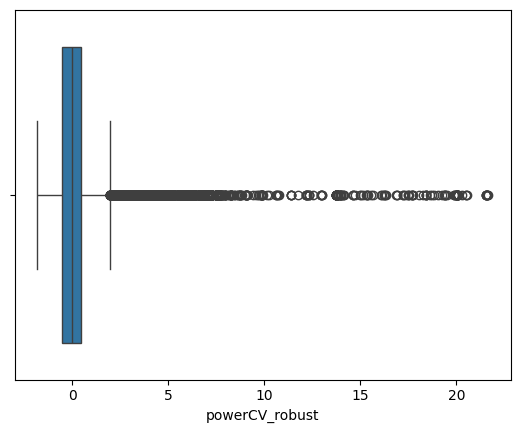

In [67]:
sns.boxplot(x='powerCV_robust', data=df_result)

In [66]:
df_result['powerCV_robust'].median()

0.0

<Axes: xlabel='powerCV_robust'>

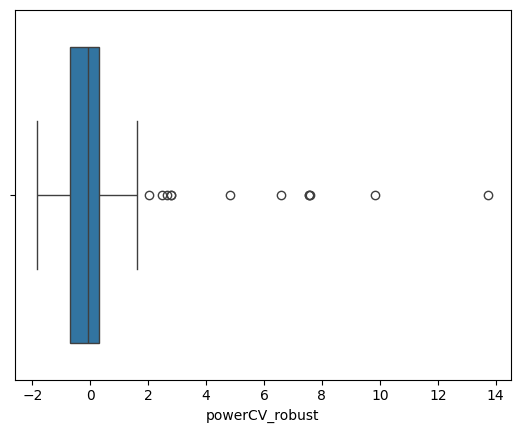

In [68]:
sns.boxplot(x='powerCV_robust', data=df_outliers_60_percent)